In [1]:
import numpy as np
import random 
import pandas as pd
import matplotlib.pyplot as plt 

from pathlib import Path
from regression_utils import *

np.set_printoptions(suppress=True)
%matplotlib inline

In [2]:
# extract dataframe for selected country
%store -r countryDataFrame

In [3]:
countryDataFrame.columns

Index(['Country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_10-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

2000


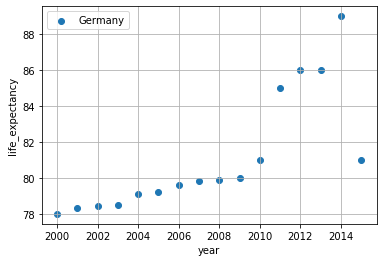

Train:Test split is:  4 : 12


In [4]:
country = 'Germany'
countryQuantityName = 'life_expectancy'
countryQuantity2Name = 'year'

# Feature 1
countryQuantity = columnExtractor(countryDataFrame, countryQuantityName)

# Feature 2
countryQuantity2 = columnExtractor(countryDataFrame, countryQuantity2Name)
#print(np.min(countryQuantity2.values))

# Visualization 
plotQuantities(countryQuantity2, countryQuantity, countryQuantity2Name, countryQuantityName, country, str(countryQuantityName)+'v/s'+str(countryQuantity2Name))

np.random.seed(5)
split = np.random.randint(1,15)
countryQuantityTrain, countryQuantity2Train, countryQuantityTest, countryQuantity2Test = randomizer(countryQuantity, countryQuantity2, split)

length scale is:  14


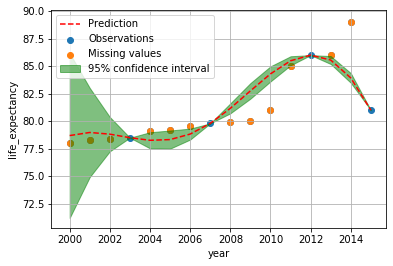

In [5]:
# Gaussian Regression 
countryQuantityPredict, sigma = gaussianRegression(countryQuantity2Train, countryQuantityTrain, countryQuantity2Test, countryQuantityTest, countryQuantity2, countryQuantity, countryQuantityName, countryQuantity2Name) 
plt.savefig('GPR output', dpi=300)

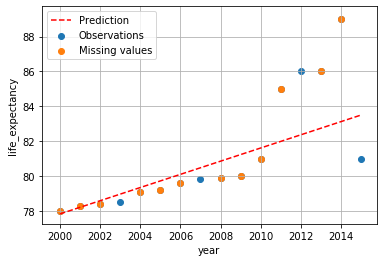

In [6]:
# Linear Regression 
countryQuantityPredictLR = linearRegression(countryQuantity2Train, countryQuantityTrain, countryQuantity2Test, countryQuantityTest, countryQuantity2, countryQuantity, countryQuantityName, countryQuantity2Name)
plt.savefig('LR output', dpi=300)

In [7]:
# error computation for GPR 
qty = 'life_expectancy'
groundTruth = columnExtractor(countryDataFrame,qty).tolist()[::-1]
print('groundTruth values \n',groundTruth)

countryQuantityPredict = [round(float(i),1) for i in list(countryQuantityPredict)]
errorGPR = np.sqrt(mean_squared_error(groundTruth, countryQuantityPredict))
print('GPR prediction \n',countryQuantityPredict)

print('------------------------------------------')


# error computation for LR 
countryQuantityPredictLR = [round(float(i),1) for i in list(countryQuantityPredictLR)]
print('LR prediction \n',list(countryQuantityPredictLR))
errorLR = np.sqrt(mean_squared_error(groundTruth, countryQuantityPredictLR))
print('')

print('GPR error: ',errorGPR)
print('LR error: ',errorLR)

#go with rmse for outliers 
#try using normalization

groundTruth values 
 [78.0, 78.3, 78.4, 78.5, 79.1, 79.2, 79.6, 79.8, 79.9, 80.0, 81.0, 85.0, 86.0, 86.0, 89.0, 81.0]
GPR prediction 
 [78.7, 79.0, 78.8, 78.5, 78.3, 78.3, 78.8, 79.8, 81.2, 82.8, 84.3, 85.5, 86.0, 85.6, 83.9, 81.0]
------------------------------------------
LR prediction 
 [77.8, 78.2, 78.6, 79.0, 79.3, 79.7, 80.1, 80.5, 80.9, 81.2, 81.6, 82.0, 82.4, 82.7, 83.1, 83.5]

GPR error:  1.7690039570334473
LR error:  2.209072203437452


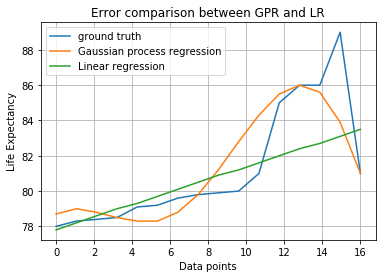

In [11]:
#comparing lr, gpr and groundtruth 

plt.ylabel('Life Expectancy')
plt.xlabel('Data points')
plt.plot(np.linspace(0,16,16), groundTruth, label='ground truth')
plt.plot(np.linspace(0,16,16), countryQuantityPredict, label = 'Gaussian process regression')
plt.plot(np.linspace(0,16,16), countryQuantityPredictLR, label = 'Linear regression')
plt.title('Error comparison between GPR and LR')
plt.legend()
plt.grid()
plt.savefig('Error analysis', dpi=300)